In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
from luciferase.io import DualLuciferaseExperimentReader

experiment = DualLuciferaseExperimentReader.read(
    '/Users/rejsmont/Desktop/24122020/metadata.xlsx', [
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t1_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t2_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_ff_t3_ag160ag161pmt.xlsx'
    ], [
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t1_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t2_ag160ag161pmt.xlsx',
        '/Users/rejsmont/Desktop/24122020/24122020_RNL_t3_ag160ag161pmt.xlsx'
    ]
)

<ipython-input-31-0bdbe240333c>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


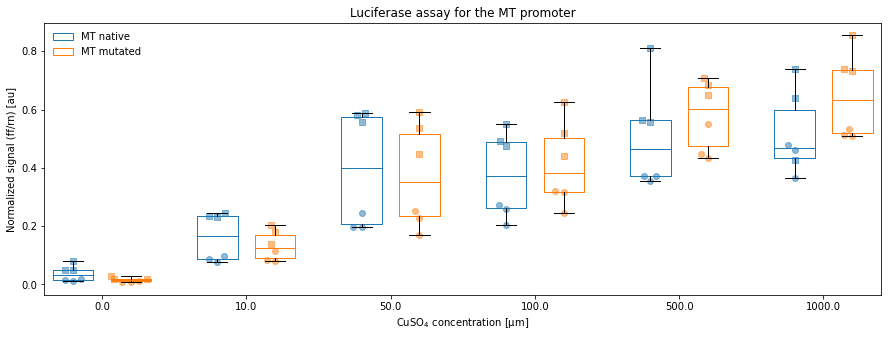

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
from luciferase import graphs

idx = pd.IndexSlice
n = experiment.normalize(background='neg')
d = n.drop(n.loc[idx[3, :], :].index) \
     .reset_index() \
     .set_index(['induction', 'sample', 'plate']) \
     .loc[:, ['normalized']] \
     .dropna() \
     .sort_index()

fig, ax = plt.subplots(figsize=(15, 5))
graphs.catplot(d, ax=ax, samples=['MT native', 'MT mutated'], spacing=0.5,
               title='Luciferase assay for the MT promoter',
               ylabel='Normalized signal (ff/rn) [au]',
               xlabel='CuSO$_4$ concentration [μm]')
fig.show()

<ipython-input-32-e20112943385>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


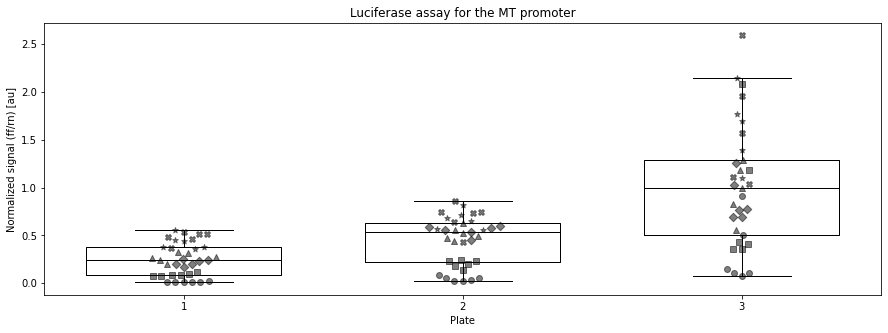

In [32]:
idx = pd.IndexSlice
n = experiment.normalize(background='neg')
d = n.drop(n.loc[idx[3, 'F', 4:6], :].index) \
     .reset_index() \
     .set_index(['plate', 'induction']) \
     .loc[:, ['normalized']] \
     .dropna() \
     .sort_index()

fig, ax = plt.subplots(figsize=(15, 5))
graphs.catplot(d, ax=ax,
               title='Luciferase assay for the MT promoter',
               ylabel='Normalized signal (ff/rn) [au]',
               xlabel='Plate')
fig.show()

In [35]:
from luciferase.io import TecanReader

plate = TecanReader.read(['/Users/rejsmont/Desktop/24122020/24122020_ff_t3A_ag160ag161pmt.xlsx',
                          '/Users/rejsmont/Desktop/24122020/24122020_ff_t3B_ag160ag161pmt.xlsx'])


AttributeError: 'NoneType' object has no attribute 'data'